# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
image_data= "/content/drive/MyDrive/defungi"

In [4]:
#Create Files_Name
#image_data='defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H1
1,H6
2,H3
3,H5
4,H2


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/defungi/H3/H3_3a_5.jpg,H3
1,/content/drive/MyDrive/defungi/H3/H3_6a_11.jpg,H3
2,/content/drive/MyDrive/defungi/H1/H1_113c_12.jpg,H1
3,/content/drive/MyDrive/defungi/H1/H1_25c_7.jpg,H1
4,/content/drive/MyDrive/defungi/H2/H2_23d_2.jpg,H2
...,...,...
9109,/content/drive/MyDrive/defungi/H6/H6_38a_4.jpg,H6
9110,/content/drive/MyDrive/defungi/H2/H2_25b_12.jpg,H2
9111,/content/drive/MyDrive/defungi/H2/H2_15a_11.jpg,H2
9112,/content/drive/MyDrive/defungi/H1/H1_31a_25.jpg,H1


# Visualization

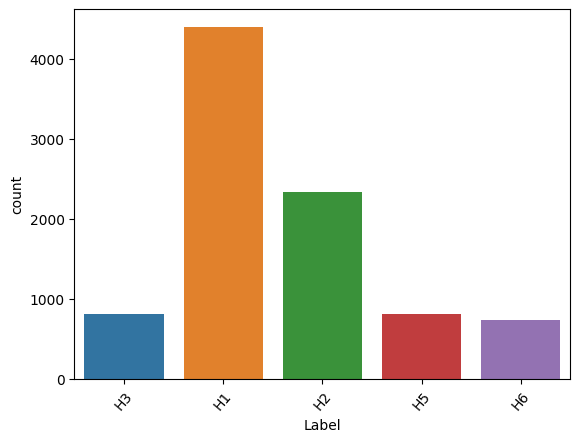

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

# Split Train and Test Dataset

In [7]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [8]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

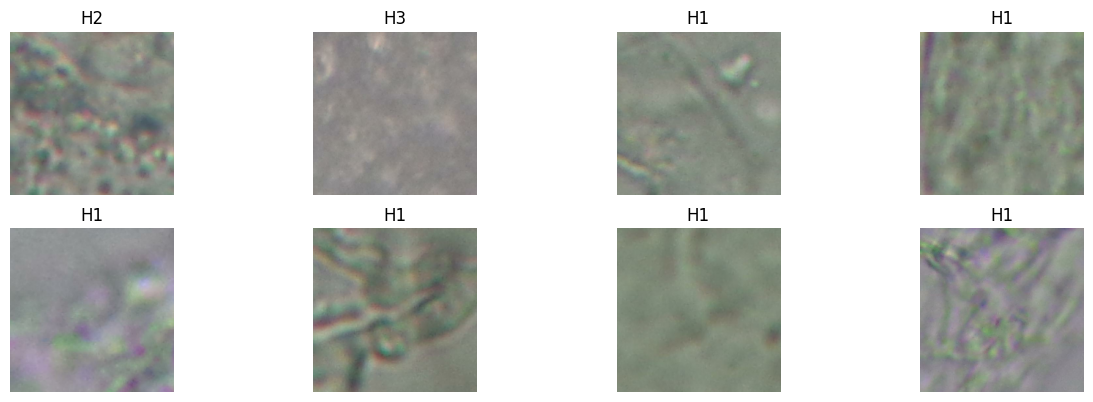

In [9]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model

In [10]:
base_model = tf.keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


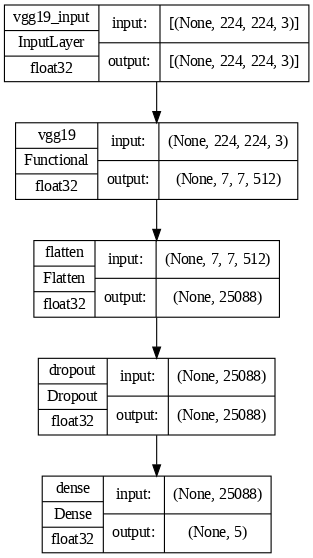

In [11]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [12]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [13]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [14]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
228/228 [==============================] - 736s 3s/step - loss: 4.4487 - accuracy: 0.5758 - val_loss: 1.7314 - val_accuracy: 0.7552
Epoch 2/20
228/228 [==============================] - 43s 187ms/step - loss: 2.8962 - accuracy: 0.7030 - val_loss: 1.3042 - val_accuracy: 0.8172
Epoch 3/20
228/228 [==============================] - 44s 189ms/step - loss: 2.3831 - accuracy: 0.7429 - val_loss: 1.2260 - val_accuracy: 0.8403
Epoch 4/20
228/228 [==============================] - 43s 188ms/step - loss: 2.2074 - accuracy: 0.7676 - val_loss: 1.2429 - val_accuracy: 0.8403
Epoch 5/20
228/228 [==============================] - 45s 194ms/step - loss: 2.0169 - accuracy: 0.7881 - val_loss: 1.3126 - val_accuracy: 0.8535
Epoch 6/20
228/228 [==============================] - 45s 196ms/step - loss: 1.9337 - accuracy: 0.7988 - val_loss: 1.1967 - val_accuracy: 0.8760
Epoch 7/20
228/228 [==============================] - 46s 200ms/step - loss: 1.8749 - accuracy: 0.8068 - val_loss: 1.1790 - val_accu

In [15]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 9s 146ms/step - loss: 1.1123 - accuracy: 0.8919
Test Loss = 1.1123378276824951
Test Accuracy = 0.8918770551681519


In [16]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,4.448695,0.575837,1.731442,0.755214
1,2.896224,0.702962,1.304217,0.817234
2,2.383094,0.742869,1.225967,0.840285
3,2.207381,0.767554,1.242905,0.840285
4,2.016928,0.788124,1.312642,0.853458
5,1.933690,0.798821,1.196746,0.875960
6,1.874902,0.806775,1.178996,0.886389
7,1.740720,0.825014,1.258395,0.856751
8,1.856566,0.829539,1.159257,0.878705
9,1.632239,0.841196,1.112338,0.891877


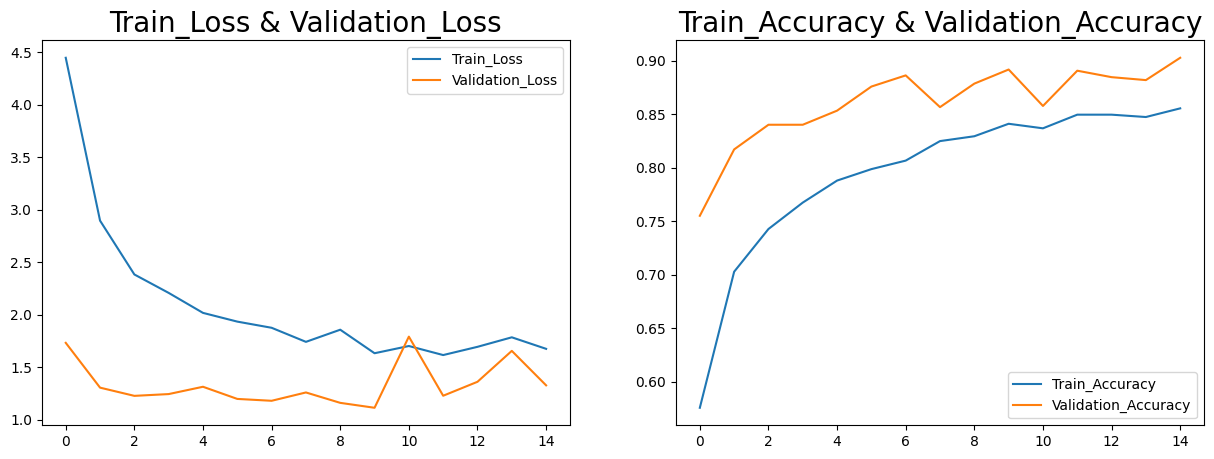

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [18]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 8s 144ms/step


,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
1817,1,0
1818,1,0
1819,1,1
1820,2,2


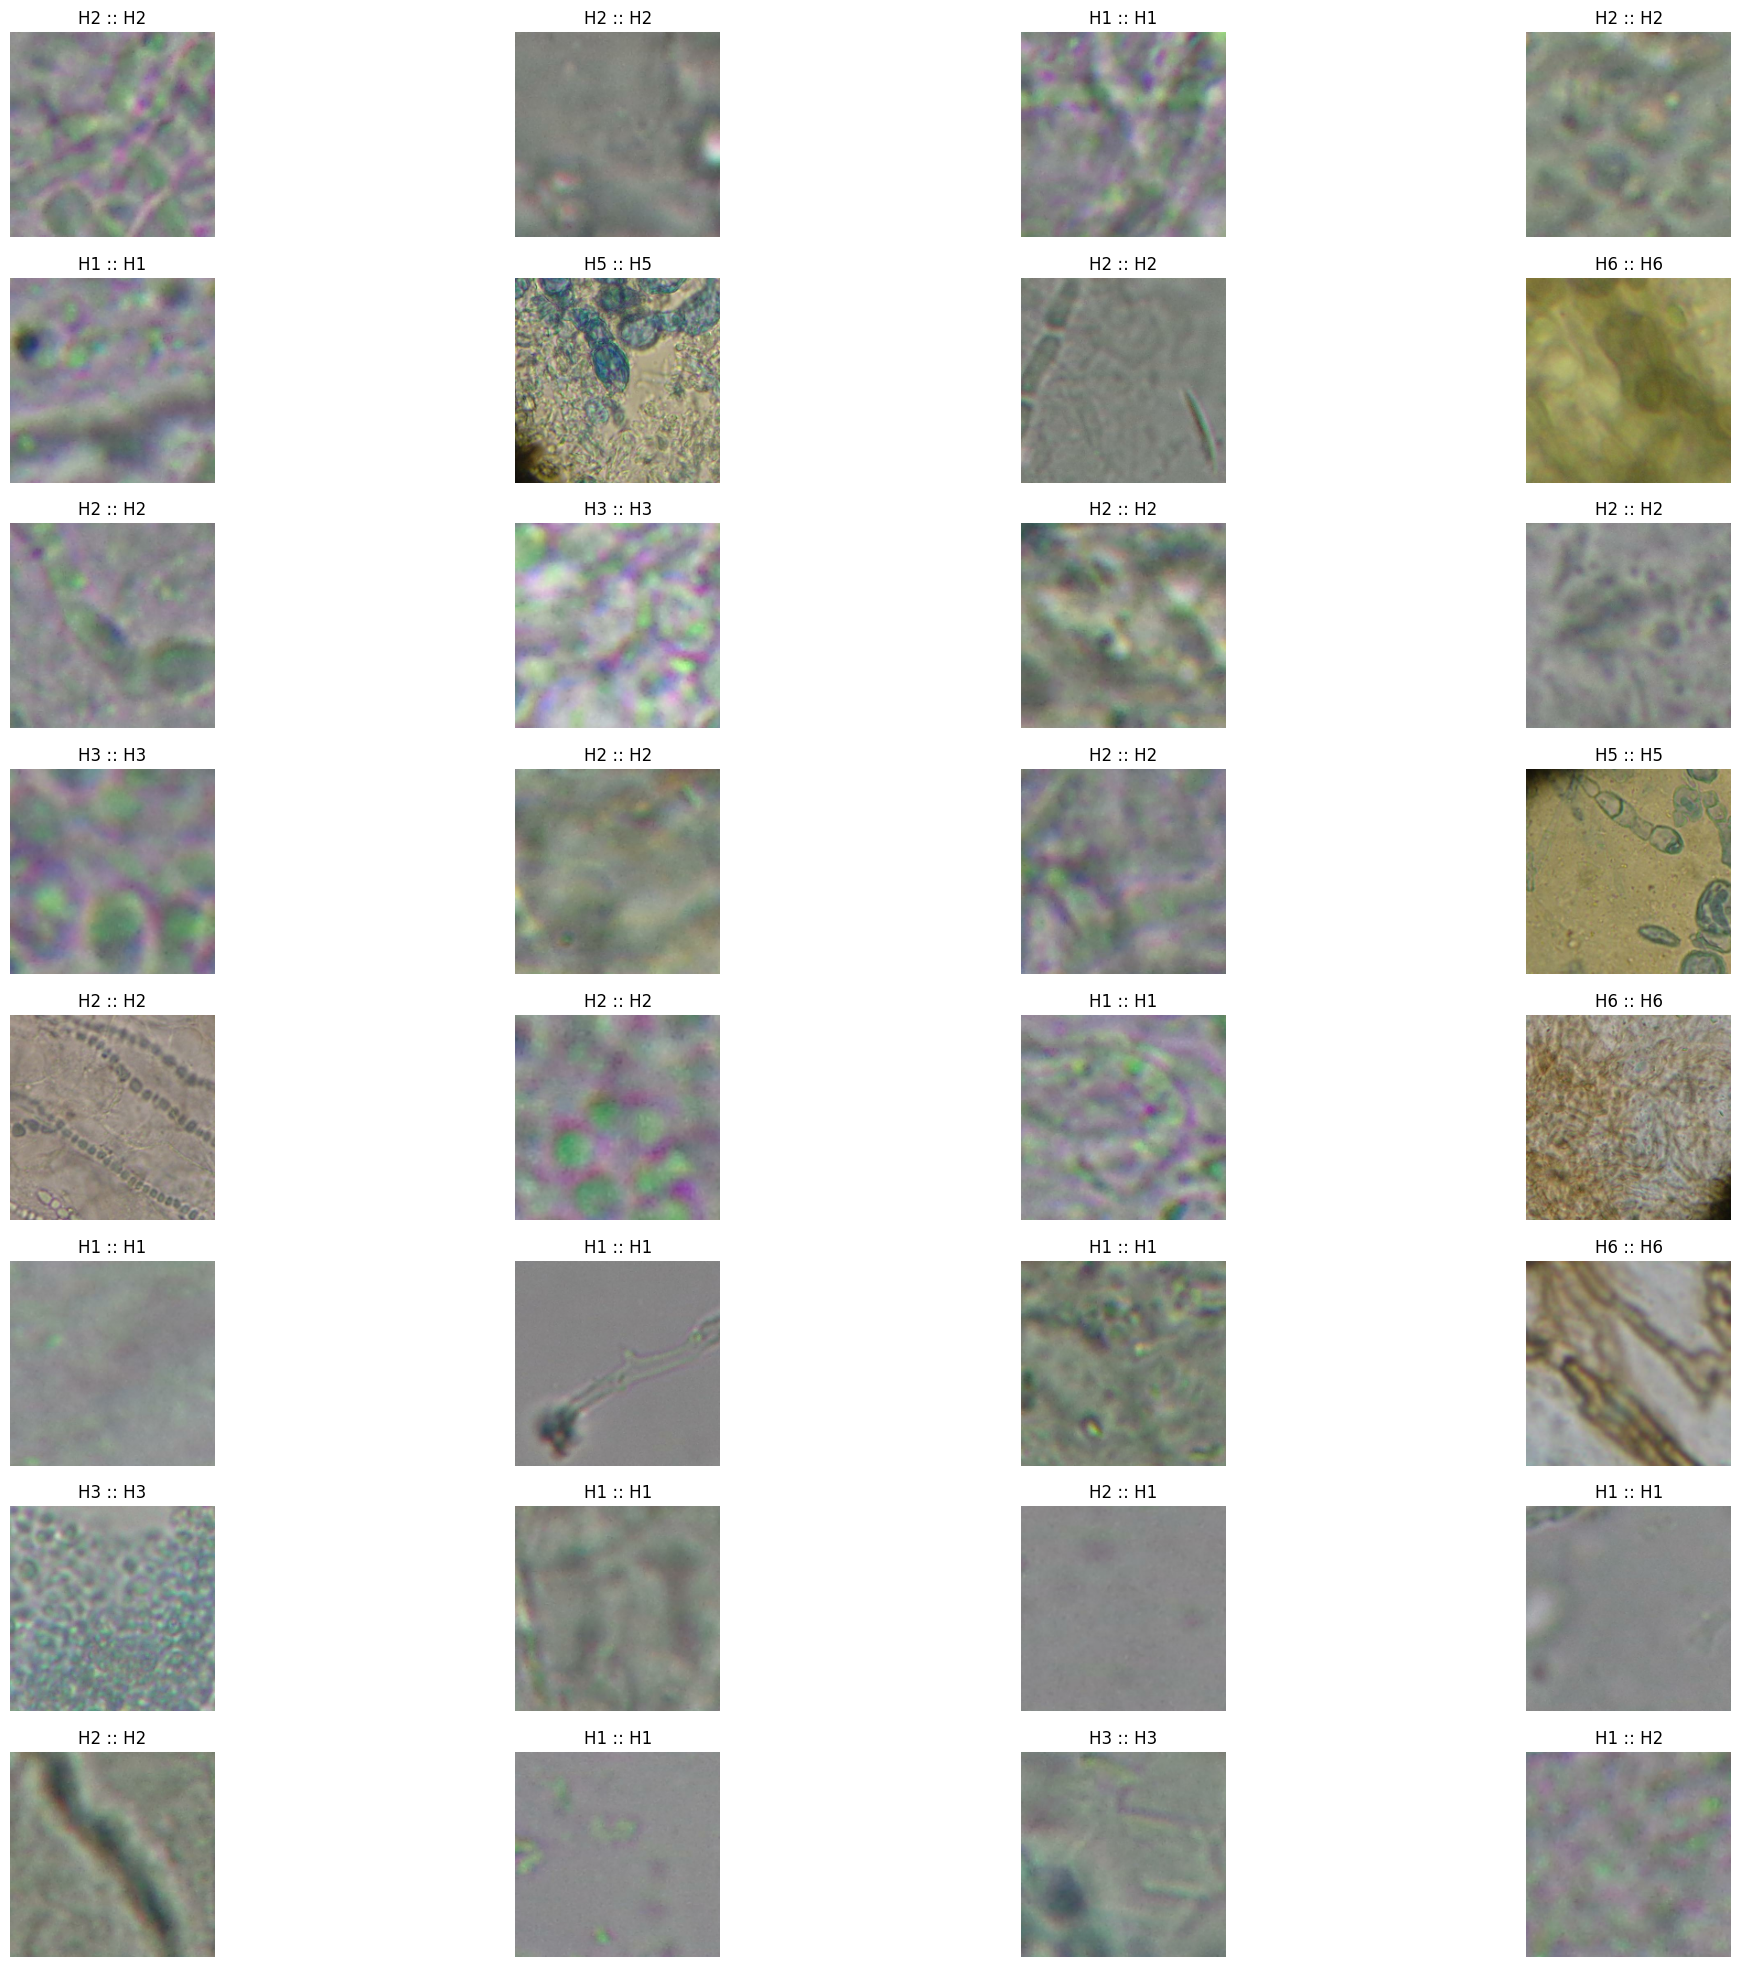

In [19]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

# Confusion_matrix

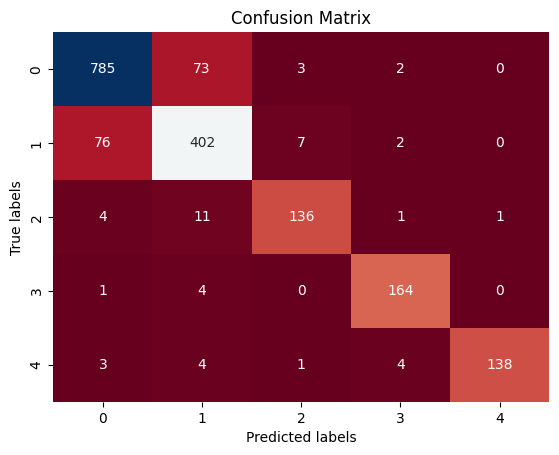

array([[785,  73,   3,   2,   0],
       [ 76, 402,   7,   2,   0],
       [  4,  11, 136,   1,   1],
       [  1,   4,   0, 164,   0],
       [  3,   4,   1,   4, 138]])

In [20]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [21]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 89.188%
